<a href="https://colab.research.google.com/github/fikranaufal/Pemodelan-Matematika-NN02/blob/main/Koding_Estimasi_Parameter_PEMOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, dsolve, solve, Derivative, symbols
from sympy.abc import x
import sympy as sp
import pandas as pd

# **ESTIMASI PARAMETER DENGAN MINIMUM SSE (Sum Squared Error)**

## Fungsi dan Persamaan Model (**JANGAN DIEDIT**)

In [ ]:
# Fungsi Turunan
def derivatives(state,Λ,β,μ,m,θ,γ,α,δ):
  S, I, A, T = state
  N = S + I + A + T
  dS = Λ - β * S * I / N - (μ + m) * S
  dI = β * S * I / N - (θ + γ + μ + m) * I
  dA = γ * I + α * T - (δ + μ + m) * A
  dT = θ * I - (α + μ + m) * T
  return np.array([dS, dI, dA, dT])

# Fungsi Integrasi Dengan Runge–Kutta Orde 4
def runge_kutta(states,times, Λ, β, μ, m, θ, γ, α, δ, dt):
  for i in range(len(times) - 1):
    y = states[i]
    k1 = derivatives(y,Λ,β,μ,m,θ,γ,α,δ)
    k2 = derivatives(y + dt/2 * k1,Λ,β,μ,m,θ,γ,α,δ)
    k3 = derivatives(y + dt/2 * k2,Λ,β,μ,m,θ,γ,α,δ)
    k4 = derivatives(y + dt * k3,Λ,β,μ,m,θ,γ,α,δ)
    states[i + 1] = y + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
  return states

## Data Des 2019 - Nov 2024 (**JANGAN DIEDIT**)

In [ ]:
# Membaca Data_Used
df = pd.read_excel('Data_Used.xlsx', header=None)
df.columns = ['nilai']  # Beri nama kolom
data = df['nilai'].values
data = data[71:130]
data

array([3313, 3724, 3850, 3335, 1108, 1129, 2217, 2757, 2898, 3318, 3163,
       3272, 2666, 2693, 3012, 3107, 3368, 2538, 2736, 2384, 2855, 2980,
       3122, 2694, 1742, 3501, 3310, 3192, 3670, 2869, 4142, 4234, 3969,
       4163, 4556, 4768, 4144, 3925, 4486, 3873, 2979, 3648, 3457, 3295,
       2473, 3358, 4207, 3854, 4513, 4284, 3997, 3614, 3067, 4619, 4206,
       5117, 5113, 5532, 5123])

## Kodingan Estimasi Parameter (Tinggal di copas) (**JANGAN DIEDIT**)

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2507888  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv
      I0_3 = data[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data)):
        error = error + (data[k] - I[k*10])**2

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data)*10], I_min[0:len(data)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data)]*10, data, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# Estimasi Parameter SSE (2014-2024)

In [ ]:
# Membaca Data_Used
df = pd.read_excel('Data_Used.xlsx', header=None)
df.columns = ['nilai']  # Beri nama kolom
data = df['nilai'].values
data

array([ 574,  789,  790,  782,  905, 1050,  917, 1021, 1297, 1013, 1323,
       1262, 1282, 1371, 1183, 1148, 1463, 1296,  934, 1215, 1362,  999,
       1413, 1145, 1375, 1463, 1253, 1477, 1856, 1600,  989, 1591, 1588,
       1477, 2179, 1705, 2060, 1904, 1865, 2201, 2263, 1680, 1939, 2404,
       1993, 2103, 2093, 1630, 2371, 2278, 1947, 2451, 2345, 1303, 2311,
       2283, 2508, 2758, 2369, 2415, 2369, 2573, 3188, 3169, 2671, 2445,
       3491, 3575, 3717, 3538, 3551, 3313, 3724, 3850, 3335, 1108, 1129,
       2217, 2757, 2898, 3318, 3163, 3272, 2666, 2693, 3012, 3107, 3368,
       2538, 2736, 2384, 2855, 2980, 3122, 2694, 1742, 3501, 3310, 3192,
       3670, 2869, 4142, 4234, 3969, 4163, 4556, 4768, 4144, 3925, 4486,
       3873, 2979, 3648, 3457, 3295, 2473, 3358, 4207, 3854, 4513, 4284,
       3997, 3614, 3067, 4619, 4206, 5117, 5113, 5532, 5123])

error = 58506747.13032156 | β = 0.81


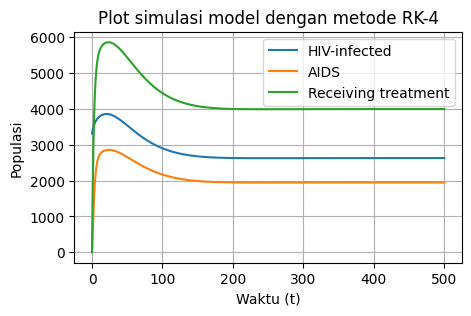

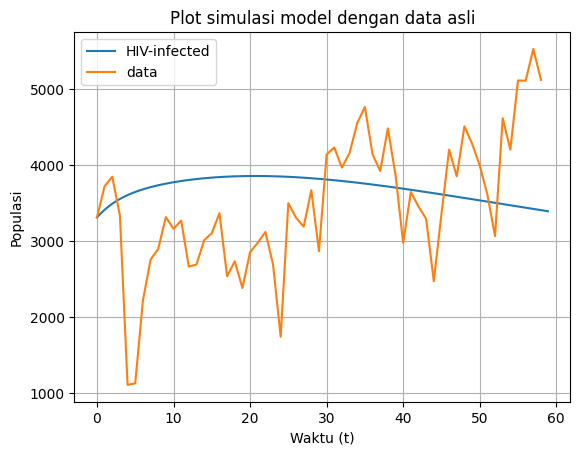

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2458503  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv
      I0_3 = data[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data)):
        error = error + (data[k] - I[k*10])**2

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data)*10], I_min[0:len(data)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data)]*10, data, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# Estimasi parameter MAPE (2014-2024)

error = 29.639119585224513 | β = 0.81


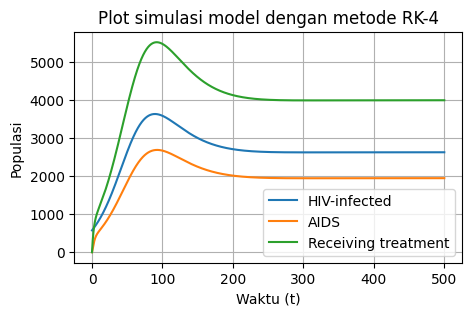

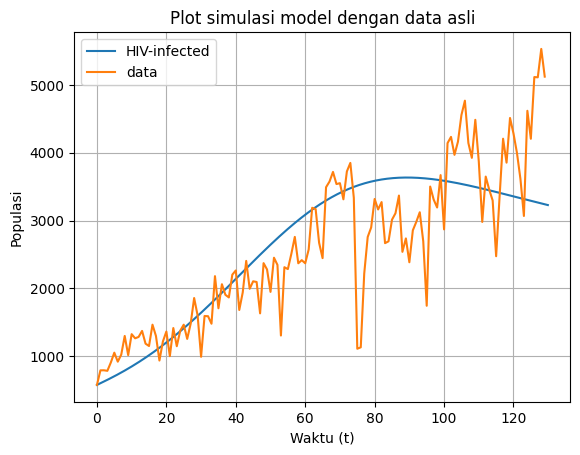

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 0.0975   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2458503  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv
      I0_3 = data[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data)):
        error = error + abs(data[k] - I[k*10])/data[k]

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data)*10], I_min[0:len(data)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data)]*10, data, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2014 - Jan 2015**

In [ ]:
# Membaca Data_Used
df = pd.read_excel('Data_Used.xlsx', header=None)
df.columns = ['nilai']  # Beri nama kolom
data = df['nilai'].values
data1 = data[0:13]
data1

array([ 574,  789,  790,  782,  905, 1050,  917, 1021, 1297, 1013, 1323,
       1262, 1282])

error = 201581.30508901097 | β = 0.8500000000000001


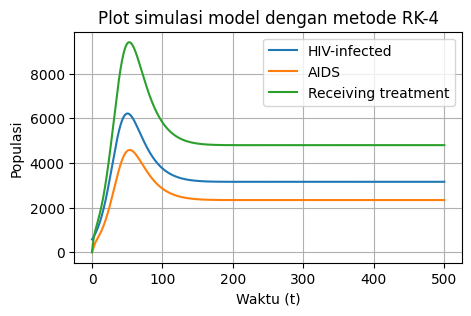

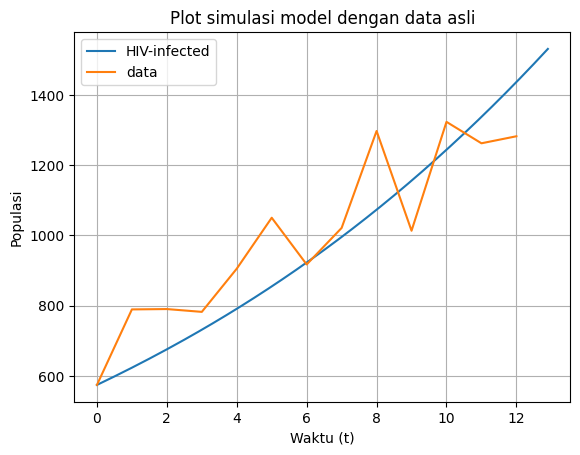

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2458503  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv, data 2013
      I0_3 = data1[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data1)):
        error = error + (data1[k] - I[k*10])**2

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data1)*10], I_min[0:len(data1)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data1)]*10, data1, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2015 - Jan 2016**

In [ ]:
# Membaca Data_Used
df = pd.read_excel('Data_Used.xlsx', header=None)
df.columns = ['nilai']  # Beri nama kolom
data = df['nilai'].values
data2 = data[12:25]
data2

array([1282, 1371, 1183, 1148, 1463, 1296,  934, 1215, 1362,  999, 1413,
       1145, 1375])

error = 314843.612703193 | β = 0.77


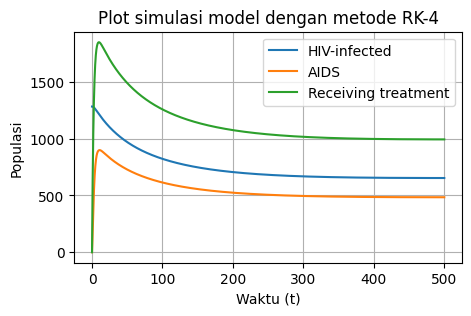

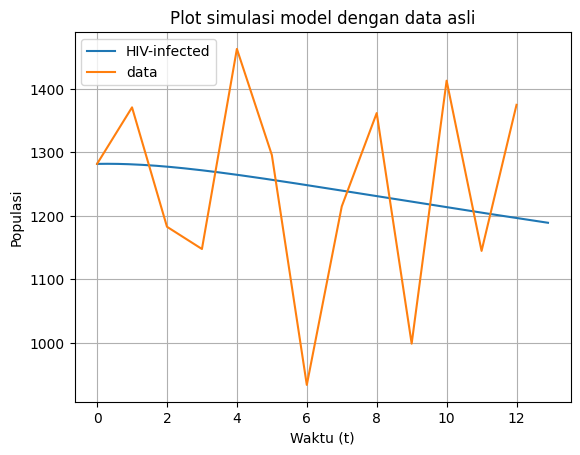

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2470802  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv, data 2014
      I0_3 = data2[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data2)):
        error = error + (data2[k] - I[k*10])**2

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data2)*10], I_min[0:len(data2)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data2)]*10, data2, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2016 - Jan 2017**

In [ ]:
# Membaca Data_Used
df = pd.read_excel('Data_Used.xlsx', header=None)
df.columns = ['nilai']  # Beri nama kolom
data = df['nilai'].values
data3 = data[24:37]
data3

array([1375, 1463, 1253, 1477, 1856, 1600,  989, 1591, 1588, 1477, 2179,
       1705, 2060])

error = 861766.6628247921 | β = 0.8


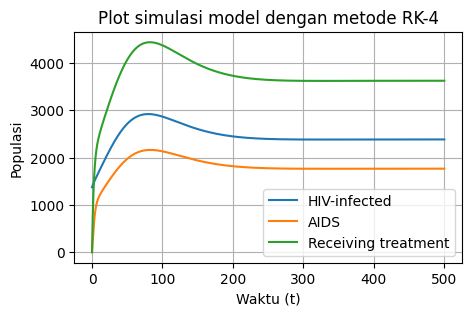

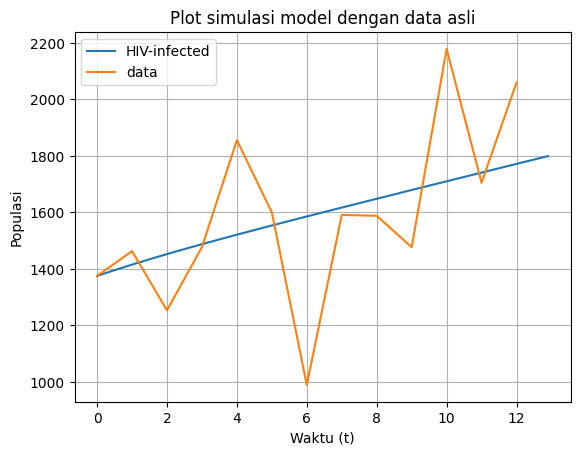

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2481469  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv, data 2015
      I0_3 = data3[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data3)):
        error = error + (data3[k] - I[k*10])**2

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data3)*10], I_min[0:len(data3)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data3)]*10, data3, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2017 - Jan 2018**

In [ ]:
# Membaca Data_Used
df = pd.read_excel('Data_Used.xlsx', header=None)
df.columns = ['nilai']  # Beri nama kolom
data = df['nilai'].values
data4 = data[36:49]
data4

array([2060, 1904, 1865, 2201, 2263, 1680, 1939, 2404, 1993, 2103, 2093,
       1630, 2371])

error = 712040.9959940383 | β = 0.78


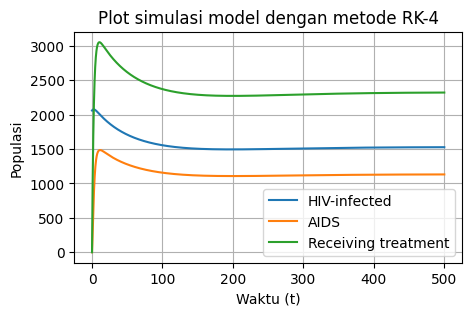

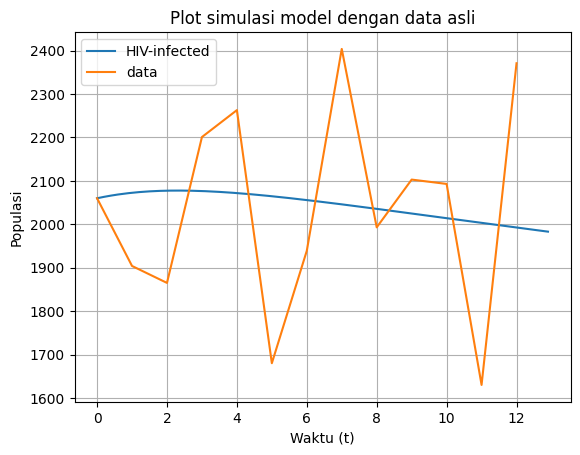

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2490622  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv, data 2016
      I0_3 = data4[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data4)):
        error = error + (data4[k] - I[k*10])**2

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data4)*10], I_min[0:len(data4)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data4)]*10, data4, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2018 - Jan 2019**

In [ ]:
# Membaca Data_Used
df = pd.read_excel('Data_Used.xlsx', header=None)
df.columns = ['nilai']  # Beri nama kolom
data = df['nilai'].values
data5 = data[48:61]
data5

array([2371, 2278, 1947, 2451, 2345, 1303, 2311, 2283, 2508, 2758, 2369,
       2415, 2369])

error = 1640115.425414558 | β = 0.78


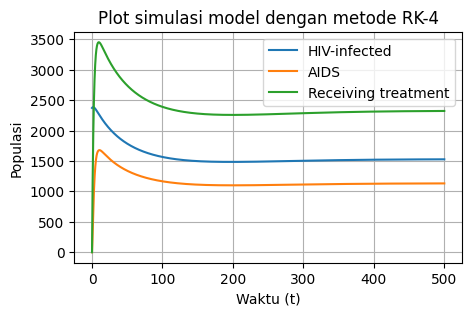

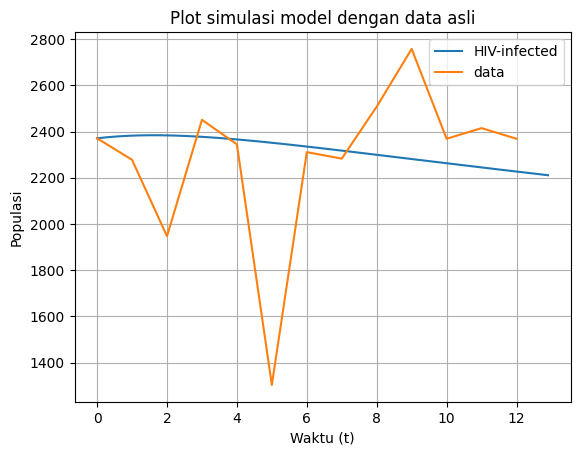

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2497938  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv, data 2017
      I0_3 = data5[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data5)):
        error = error + (data5[k] - I[k*10])**2

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data5)*10], I_min[0:len(data5)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data5)]*10, data5, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2019 - Jan 2020**

In [ ]:
# Membaca Data_Used
df = pd.read_excel('Data_Used.xlsx', header=None)
df.columns = ['nilai']  # Beri nama kolom
data = df['nilai'].values
data6 = data[60:73]
data6

array([2369, 2573, 3188, 3169, 2671, 2445, 3491, 3575, 3717, 3538, 3551,
       3313, 3724])

error = 1413493.5864875375 | β = 0.8300000000000001


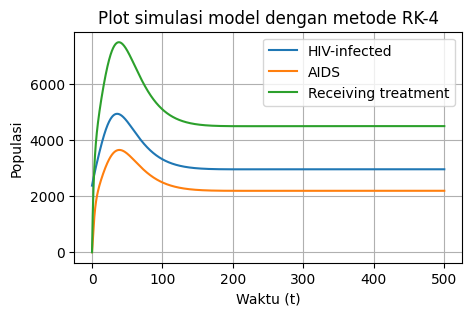

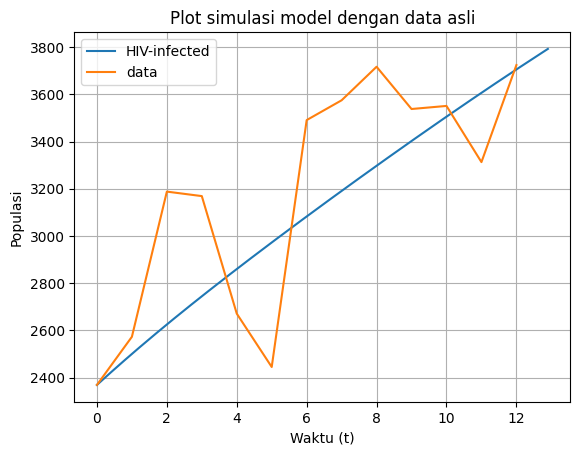

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2503708  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv, data 2018
      I0_3 = data6[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data6)):
        error = error + (data6[k] - I[k*10])**2

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data6)*10], I_min[0:len(data6)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data6)]*10, data6, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2020 - Jan 2021**

In [ ]:
# Membaca Data_Used
df = pd.read_excel('Data_Used.xlsx', header=None)
df.columns = ['nilai']  # Beri nama kolom
data = df['nilai'].values
data7 = data[72:85]
data7

array([3724, 3850, 3335, 1108, 1129, 2217, 2757, 2898, 3318, 3163, 3272,
       2666, 2693])

error = 11803105.38522808 | β = 0.7500000000000001


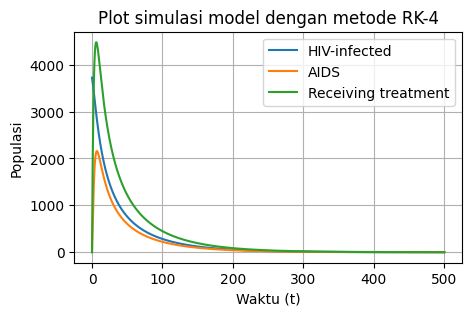

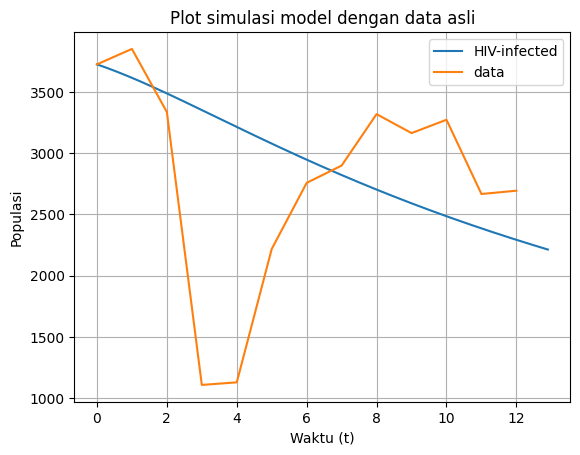

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2507888  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv, data 2019
      I0_3 = data7[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data7)):
        error = error + (data7[k] - I[k*10])**2

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data7)*10], I_min[0:len(data7)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data7)]*10, data7, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2021 - Jan 2022**

In [ ]:
# Membaca Data_Used
df = pd.read_excel('Data_Used.xlsx', header=None)
df.columns = ['nilai']  # Beri nama kolom
data = df['nilai'].values
data8 = data[84:97]
data8

array([2693, 3012, 3107, 3368, 2538, 2736, 2384, 2855, 2980, 3122, 2694,
       1742, 3501])

error = 2559061.0578736635 | β = 0.79


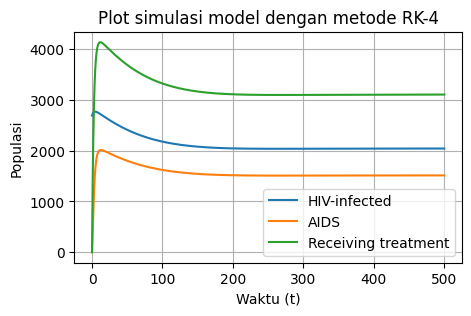

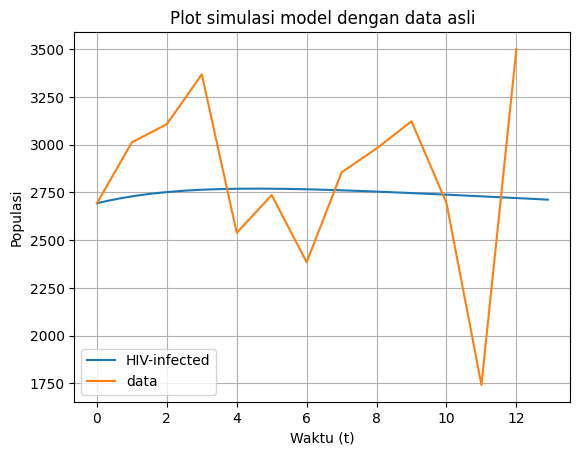

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2500965  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv, data 2020 disdukcapil
      I0_3 = data8[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data8)):
        error = error + (data8[k] - I[k*10])**2

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data8)*10], I_min[0:len(data8)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data8)]*10, data8, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2022 - Jan 2023**

In [ ]:
# Membaca Data_Used
df = pd.read_excel('Data_Used.xlsx', header=None)
df.columns = ['nilai']  # Beri nama kolom
data = df['nilai'].values
data9 = data[96:109]
data9

array([3501, 3310, 3192, 3670, 2869, 4142, 4234, 3969, 4163, 4556, 4768,
       4144, 3925])

error = 2242160.3795211115 | β = 0.8200000000000001


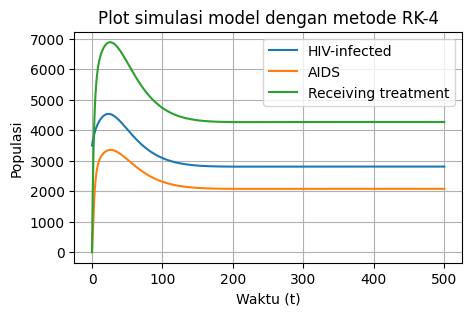

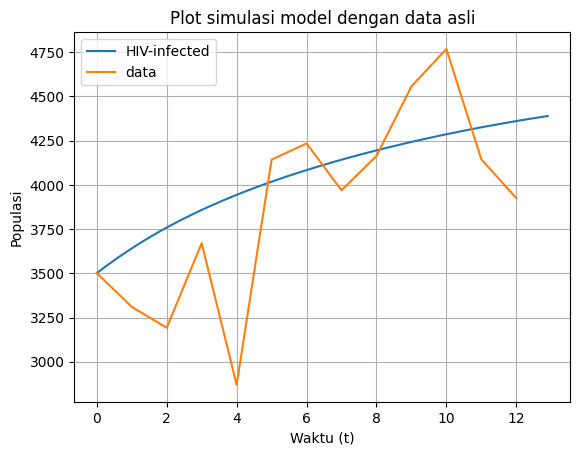

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2527854  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv, data 2021 disdukcapil
      I0_3 = data9[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data9)):
        error = error + (data9[k] - I[k*10])**2

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data9)*10], I_min[0:len(data9)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data9)]*10, data9, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2023 - Jan 2024**

In [ ]:
# Membaca Data_Used
df = pd.read_excel('Data_Used.xlsx', header=None)
df.columns = ['nilai']  # Beri nama kolom
data = df['nilai'].values
data10 = data[108:121]
data10

array([3925, 4486, 3873, 2979, 3648, 3457, 3295, 2473, 3358, 4207, 3854,
       4513, 4284])

error = 5348703.136994758 | β = 0.79


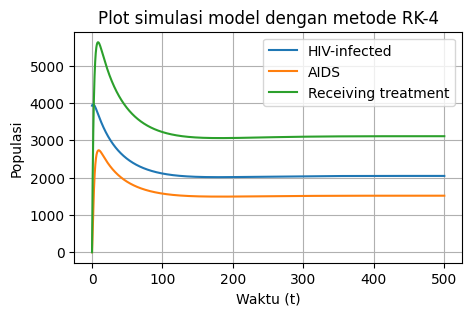

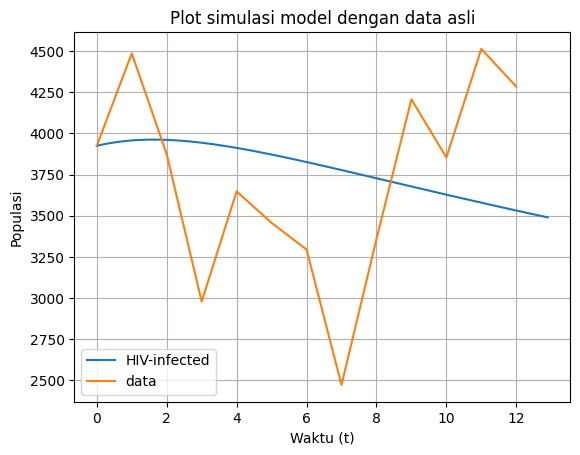

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2545005  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv, data 2022 disdukcapil
      I0_3 = data10[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data10)):
        error = error + (data10[k] - I[k*10])**2

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data10)*10], I_min[0:len(data10)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data10)]*10, data10, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Plot parameter transmisi per tahun**

Rata-rata parameter transmisi per tahun: 0.796


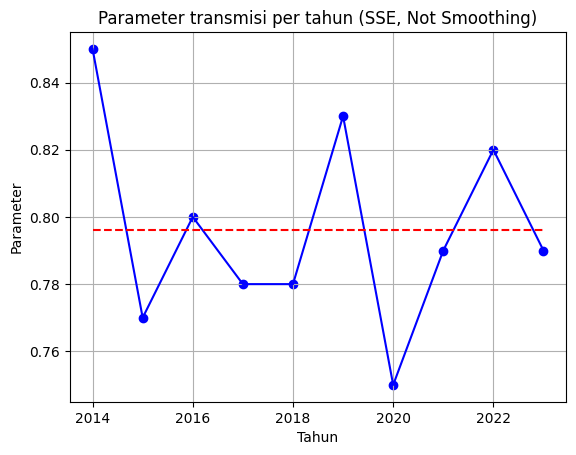

In [ ]:
# Nilai parameter per tahun
parameter = [0.85,
             0.77,
             0.80,
             0.78,
             0.78,
             0.83,
             0.75,
             0.79,
             0.82,
             0.79]

# waktu dari 2014 sampai 2023
waktu = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# rata-rata parameter per tahun
rata_rata = sum(parameter) / len(parameter)
print("Rata-rata parameter transmisi per tahun:", rata_rata)


# Plot grafik
plt.scatter(waktu, parameter, color="blue")
plt.plot(waktu, parameter, color='blue')
plt.plot(waktu, [rata_rata] * len(waktu), color='red', linestyle='--')
plt.title('Parameter transmisi per tahun (SSE, Not Smoothing)')
plt.xlabel('Tahun')
plt.ylabel('Parameter')
plt.grid(True)
plt.show()

# **ESTIMASI PARAMETER DENGAN MINIMUM MAPE (Mean Absolute Percentage Error)**

# Des 2019 - Okt 2024 (data) **(Tinggal di copas) (JANGAN DIEDIT)**

error = 30.034551989424287 | β = 0.8


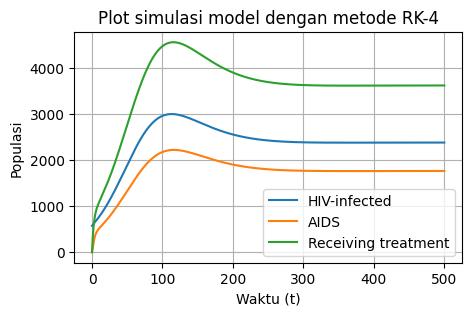

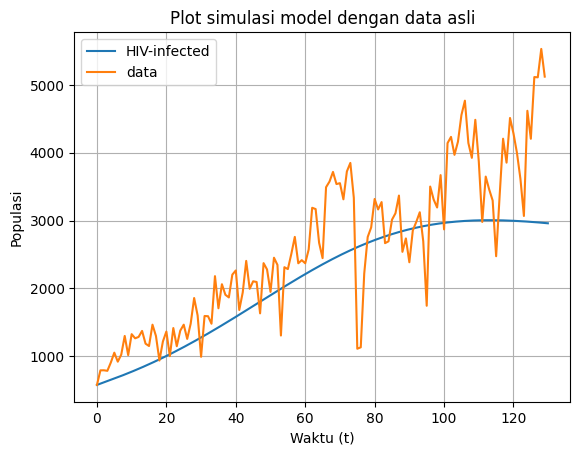

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2507888  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv
      I0_3 = data[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data)):
        error = error + abs(data[k] - I[k*10])/data[k]

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data)*10], I_min[0:len(data)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data)]*10, data, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2014 - Jan 2015** (data1)

error = 1.3160424659792807 | β = 0.8500000000000001


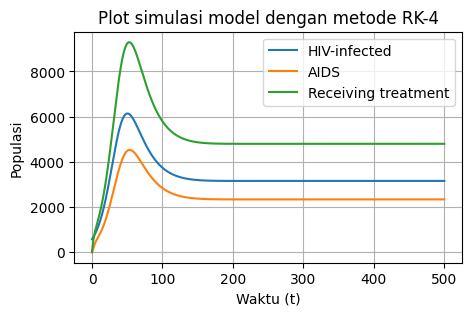

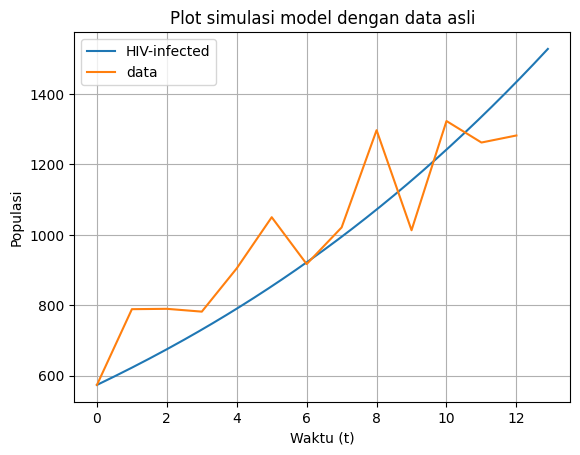

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2458503  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv
      I0_3 = data1[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data1)):
        error = error + abs(data1[k] - I[k*10])/data1[k]

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data1)*10], I_min[0:len(data1)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data1)]*10, data1, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2015 - Jan 2016** (data2)

error = 1.4182205778435797 | β = 0.77


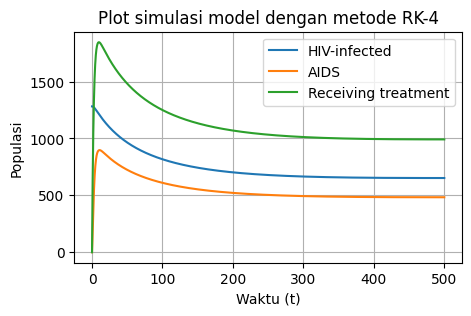

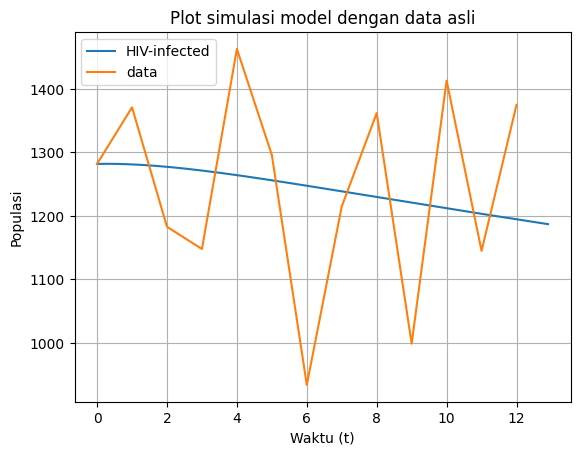

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2470802  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv
      I0_3 = data2[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data2)):
        error = error + abs(data2[k] - I[k*10])/data2[k]

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data2)*10], I_min[0:len(data2)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data2)]*10, data2, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2016 - Jan 2017** (data3)

error = 1.5764915410868312 | β = 0.8


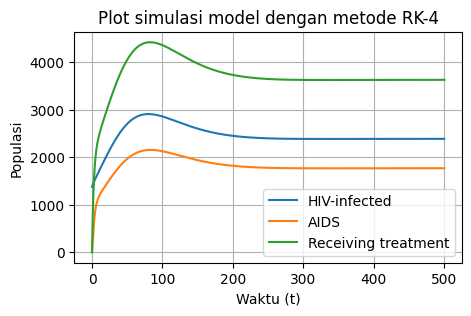

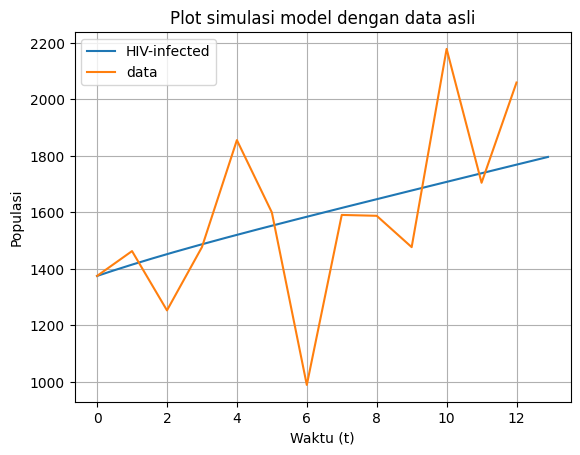

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2481469  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv
      I0_3 = data3[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data3)):
        error = error + abs(data3[k] - I[k*10])/data3[k]

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data3)*10], I_min[0:len(data3)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data3)]*10, data3, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2017 - Jan 2018** (data4)

error = 1.266848492894467 | β = 0.78


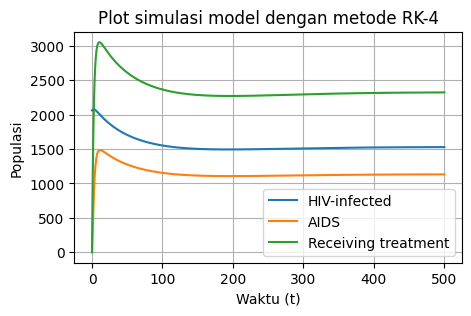

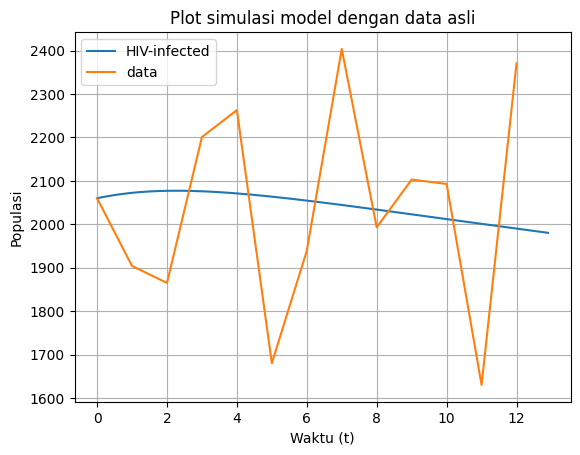

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2490622  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv
      I0_3 = data4[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data4)):
        error = error + abs(data4[k] - I[k*10])/data4[k]

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data4)*10], I_min[0:len(data4)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data4)]*10, data4, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2018 - Jan 2019** (data5)

error = 1.572357334693995 | β = 0.78


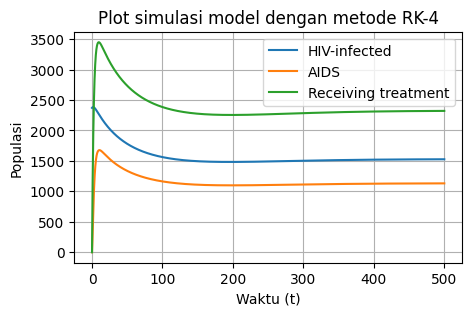

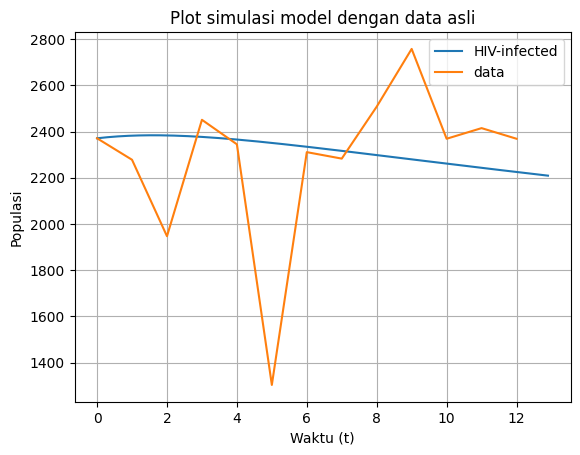

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2497938  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv
      I0_3 = data5[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data5)):
        error = error + abs(data5[k] - I[k*10])/data5[k]

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data5)*10], I_min[0:len(data5)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data5)]*10, data5, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2019 - Jan 2020** (data6)

error = 1.1083486748650144 | β = 0.8300000000000001


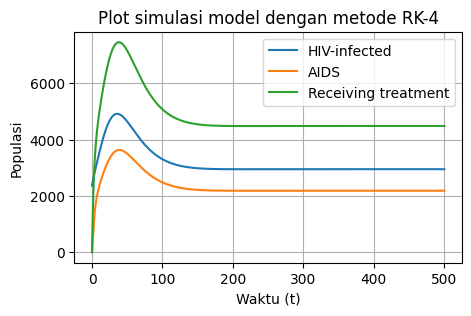

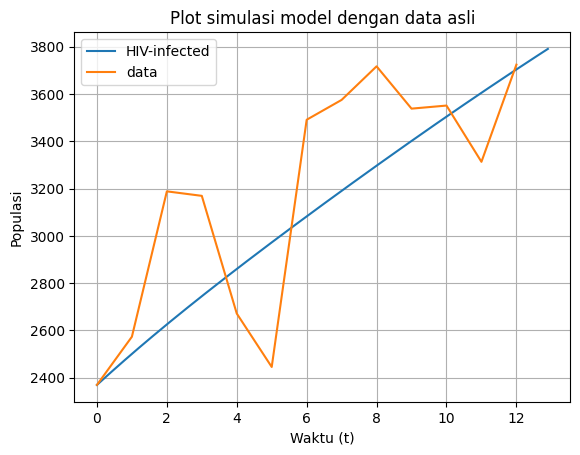

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2503708  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv
      I0_3 = data6[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data6)):
        error = error + abs(data6[k] - I[k*10])/data6[k]

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data6)*10], I_min[0:len(data6)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data6)]*10, data6, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2020 - Jan 2021** (data7)

error = 5.289653024282347 | β = 0.76


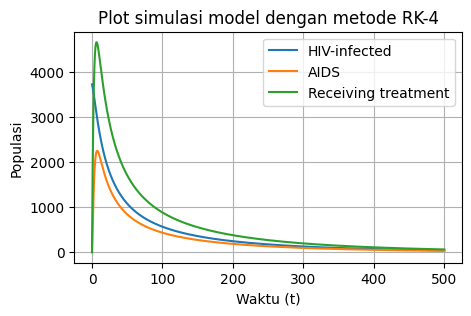

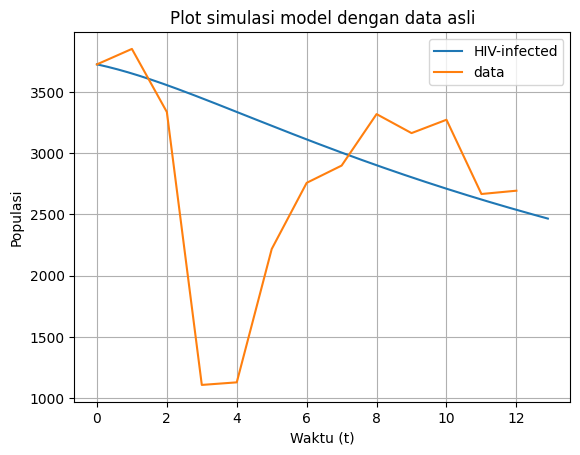

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2507888  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv
      I0_3 = data7[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data7)):
        error = error + abs(data7[k] - I[k*10])/data7[k]

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data7)*10], I_min[0:len(data7)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data7)]*10, data7, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2021 - Jan 2022** (data8)

error = 1.6859426961955317 | β = 0.79


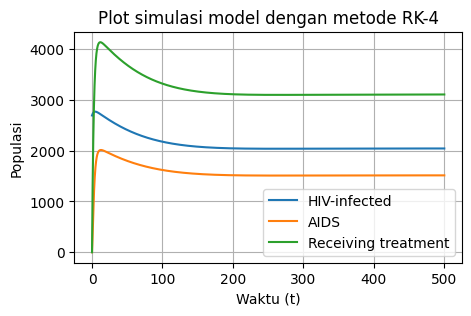

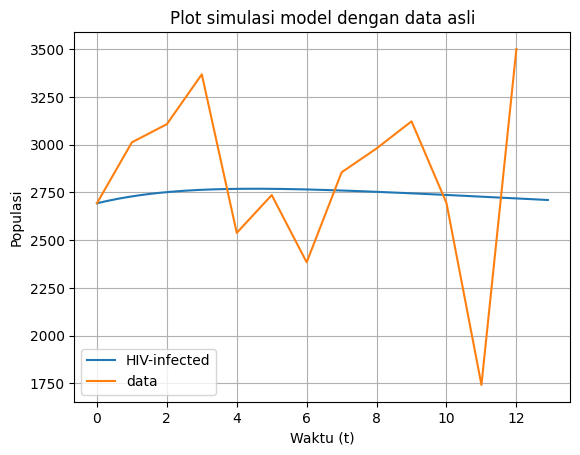

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2500965  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv
      I0_3 = data8[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data8)):
        error = error + abs(data8[k] - I[k*10])/data8[k]

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data8)*10], I_min[0:len(data8)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data8)]*10, data8, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2022 - Jan 2023** (data9)

error = 1.149447748815646 | β = 0.8200000000000001


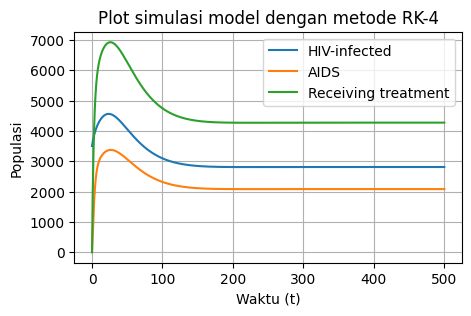

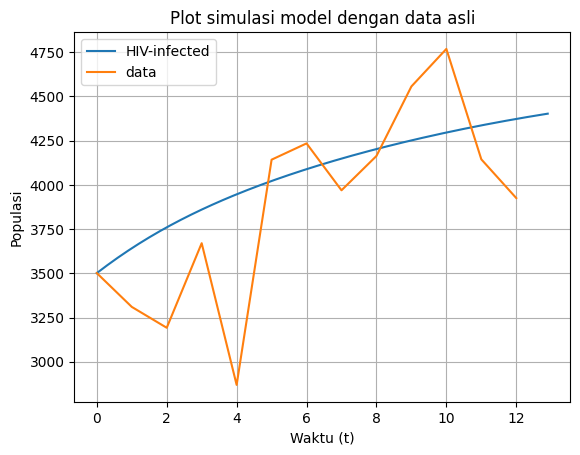

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2527854  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv
      I0_3 = data9[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data9)):
        error = error + abs(data9[k] - I[k*10])/data9[k]

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data9)*10], I_min[0:len(data9)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data9)]*10, data9, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

# **Jan 2023 - Jan 2024** (data10)

error = 1.9450872003746253 | β = 0.78


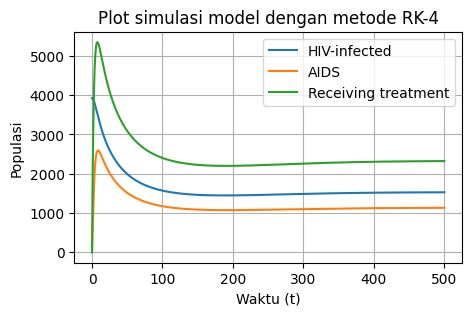

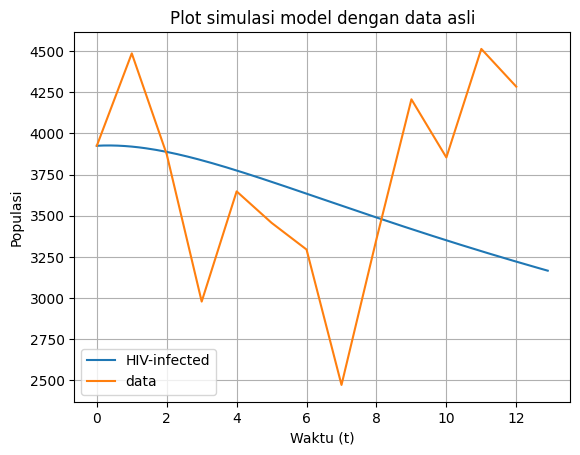

In [ ]:
I_min = 0
β_min = 1
error_min = 10**12

for i in range(10): # 10 pangkat minus
  for j in range(9): # puluhan
    for jj in range(10): # satuan

# Parameter Model Di Kota Bandung
      β_3 = (j+1)*10**(-i-1) + (jj)*10**(-i-2)   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat

      Λ_3 = 37338/12    # Menyatakan laju recruitment pada kelas susceptible
                      # (37.338/12, jumlah kelahiran/12 bulan BPS 2022)

      μ_3 = 18815/2506603  # Menyatakan laju kematian alami
                         # (18.815/2.506.603, jumlah kematian/jumlah penduduk BPS 2023)

      m_3 = 0     # Menyatakan laju emigrasi

      θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
                # (65% data dikes bandung)

      γ_3 = 357/3313   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS,
                     # (357/3313, aids/hiv 2019)

      α_3 = 1-0.58  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
                # (1-58%, 1-88%, 58% data unpad rs hasan sadikin, 88% data penelitian puskesmas)

      δ_3 = 1   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
      S0_3 = 0.1*2545005  # Susceptible, asumsi 10% penduduk jabar beresiko tertular hiv
      I0_3 = data10[0]    # HIV-infected, data dikes pada Desember 2019
      A0_3 = 0       # AIDS
      T0_3 = 0       # Receiving treatment

# Waktu Simulasi
      t02, t_end2, dt = 0.0, 500 , 0.1
      times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
      states_3 = np.zeros((len(times_2),4))
      states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
      States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)
      S = States_3[:, 0]
      I = States_3[:, 1]
      A = States_3[:, 2]
      T = States_3[:, 3]

# Minimum Error
      error = 0;
      for k in range (len(data10)):
        error = error + abs(data10[k] - I[k*10])/data10[k]

      if error < error_min:
        S_min = S
        I_min = I
        A_min = A
        T_min = T
        β_min = β_3
        error_min = error


# Menampilkan eror minimum dan parameternya
print(f"error = {error_min} | β = {β_min}")

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(5,3)
#plt.plot(times_2, S_min, label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, I_min, label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, A_min, label='AIDS') # Plot hasil AIDS
plt.plot(times_2, T_min, label='Receiving treatment') # Plot hasil Treatment
plt.title('Plot simulasi model dengan metode RK-4')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
# plt.xlim(200, 800)
# plt.ylim(0,50)
plt.show()

# Membandingkan hasil data simulasi dengan data asli
plt.plot(times_2[0:len(data10)*10], I_min[0:len(data10)*10], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2[0:len(data10)]*10, data10, label='data') # plot data asli
plt.title('Plot simulasi model dengan data asli')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
#plt.xlim(0, 6)
plt.show()

#Plot Parameter Transmisi per tahun MAPE

Rata-rata parameter transmisi per tahun: 0.796


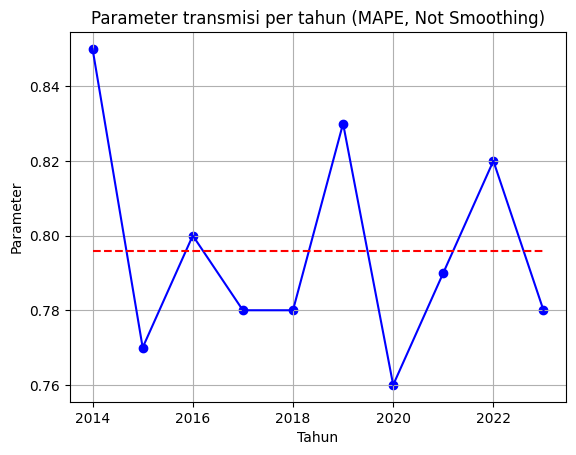

In [ ]:
# Nilai parameter per tahun
parameter2 = [0.85,
             0.77,
             0.80,
             0.78,
             0.78,
             0.83,
             0.76,
             0.79,
             0.82,
             0.78]

# waktu dari 2014 sampai 2023
waktu = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# rata-rata parameter per tahun
rata_rata = sum(parameter2) / len(parameter2)
print("Rata-rata parameter transmisi per tahun:", rata_rata)


# Plot grafik
plt.scatter(waktu, parameter2, color="blue")
plt.plot(waktu, parameter2, color='blue')
plt.plot(waktu, [rata_rata] * len(waktu), color='red', linestyle='--')
plt.title('Parameter transmisi per tahun (MAPE, Not Smoothing)')
plt.xlabel('Tahun')
plt.ylabel('Parameter')
plt.grid(True)
plt.show()